# Notebook 3: Exploring the Data II

**By the end of this notebook, you should be able to**:
- Distinguish outcome and explanatory variables
- Explore explanatory variables in Pandas (incl. filter and group)
- Understand scatter plots and create one
<br>

## 3.1: Seeing the Problem in Data

In the prior notebook, you started to explore data about the cholera epidemic, and some of you *may* have even come up with your own theories as to why it happened.

In this section, we will dig even deeper into our data science toolkit to try to pinpoint how people got infected by cholera.

<br>

<table><tr>
    <td> <img src="https://raw.githubusercontent.com/uchicago-dsi/2023-data4all/main/imgs/charlie.jpeg?raw=true" alt="Drawing" width="500"/> </td>
</tr></table>





Let's begin by loading the Pandas toolkit for Python and our data set:

In [1]:
import pandas as pd
Outbreak = pd.read_csv("https://raw.githubusercontent.com/uchicago-dsi/2023-data4all/main/Datasets/The_Outbreak_of_1849.csv?raw=true")


In the previous notebook, we selected `deaths_per_1000` as our ***outcome variable***.


In this notebook, we take the next step to develop a **proposed explanation** or ***hypothesis*** for why some people died of cholera and others did not. We will make these explanations measurable with variables called **explanatory variables**.

While there should be only one outcome variable, there can be multiple explanatory variables. *Why?* Because explanations often have multiple contributing factors!

<br>

<table><tr>
    <td> <img src="https://raw.githubusercontent.com/uchicago-dsi/2023-data4all/main/imgs/math2.jpeg?raw=true" alt="Drawing" width="500"/> </td>
</tr></table>

<br>

For example, if you want to explain to your parents why you did so well in math class (the outcome variable), you might be able to *explain* it with the number of hours you studied, the amount of sleep you got the night before the test, and even your astrological sign (hey, we're not here to judge!).

--------------------

<img src="https://github.com/uchicago-dsi/2023-data4all/blob/main/imgs/pencil.png?raw=true" alt="Drawing" align=left width=20px/> **Journal 3A**: Brainstorm
    
What are up to 3 potential explanations for where people got cholera from? With or without peeking at the data, how would you measure this with explanatory variables for our outcome variable (cholera deaths per 1,000 people)?</font>

> Write your answer here!

In [2]:
print("\n*** Potential Explanatory variables *** ")
Outbreak.head(0)


*** Potential Explanatory variables *** 


,district,region,population,area,elevation,number_houses,house_value_average,deaths


In [3]:
# Our outcome variable: mortality rate!
Outbreak["deaths_per_1000"] = Outbreak['deaths'] / Outbreak['population'] * 1000

# And we'll take a peek at the data
print("\n*** The Outcome variable *** ")
Outbreak[["district", "deaths_per_1000"]].head()



*** The Outcome variable *** 


,district,deaths_per_1000
0,Bermondsey,15.250997
1,Bethnal Green,8.747907
2,Camberwell,9.219456
3,Chelsea,4.368743
4,City of London,3.700923


Our job now is to explore explanatory variables that could potentially explain the mortality rate. While you will soon explore your own ideas, let's together explore one potential explanatory variable -- **Population Density**.

Population density is a measure of 'crowded-ness' for geographic areas (like cities!). It is "people per unit of area".

----------------------

<img src="https://github.com/uchicago-dsi/2023-data4all/blob/main/imgs/pencil.png?raw=true" alt="Drawing" align=left width=20px/> <font size=4> **Journal 3B:** Population Density </font>

**Why might population density explain why some people get cholera, but not others?**

> Write your answer here!

-------------------

#### Go ahead and add your variable for population density below!

In [4]:
# Population density
Outbreak["pop_density"] = Outbreak['population'] / Outbreak['area']
Outbreak.head()


,district,region,population,area,elevation,number_houses,house_value_average,deaths,deaths_per_1000,pop_density
0,Bermondsey,South,48128,688,0,5674,18,734,15.250997,69.953488
1,Bethnal Green,East,90193,760,38,11782,9,789,8.747907,118.675000
2,Camberwell,South,54667,4342,4,6843,25,504,9.219456,12.590281
3,Chelsea,West,56538,865,12,5648,29,247,4.368743,65.361850
4,City of London,Central,55932,434,31,7921,117,207,3.700923,128.875576


**Congratulations, you have created your first explanatory variable!**

Now let's dig in to see if we *think* it potentially explains why people get cholera.


### How do our data look between geographical regions?

To do this, we will add two additional tools to our data science toolbox: **filter** and **groupby**.

Filtering is a method for subsetting a dataframe based on a defined criteria. You can filter to get only the rows matching certain criteria. If my data frame about rainfall in US cities is called `df`, then:

<br>

```
heavy_rain_df = df[df["inches_of_rain"] > 10]``` </br>
<i>- this code filters all rows where values in the 'inches_of_rain' column is more than 10</i>
<br></br>

```five_inch_df = df[df["inches_of_rain"] == 5.0]```</br>
<i>- this code filters all rows where values in the 'inches_of_rain' column is equal to 5</i>
<br></br>

```only_chicago_df = df[df["city"] == "Chicago"]``` </br>
<i>- this code filters all rows where values in the 'city' column is equal to the string "Chicago"</i>


<br>

In the following, let's filter to see how our explanatory variable performs on the "Central" region of London.
<br>

In [5]:
# Make a variable called "CentralData" that includes only districts in the Central region.
CentralData = Outbreak[(Outbreak['region'] == 'Central')]

In [6]:
# Now let us compare our outcome (dependent) and (explanatory) independent variable!
print(CentralData[["deaths_per_1000", "pop_density"]].mean())

deaths_per_1000      5.021616
pop_density        224.601519
dtype: float64


### Coding exercise!
**Repeat the process for the Southern region in the following cell!**

In [7]:
# Show population density and deaths per 1000 of Southern London.
# Put code here.
SouthData = Outbreak[(Outbreak['region'] == 'South')]
print(SouthData[["deaths_per_1000", "pop_density"]].mean())

deaths_per_1000    12.599687
pop_density        64.310969
dtype: float64


**Groupby**: Pandas gives us an easier way to check every region at once! We can use this to filter on 'aggregates' like 'mean' and 'sum'.

In [8]:
# Calculate averages after filtering and compare
ByRegion = Outbreak.groupby("region")[["deaths_per_1000", "pop_density"]].agg('mean')

ByRegion[["deaths_per_1000", "pop_density"]]

,deaths_per_1000,pop_density
region,,
Central,5.021616,224.601519
East,6.326963,131.270224
North,1.780560,43.330858
South,12.599687,64.310969
West,3.298961,86.505475


<img src="https://github.com/uchicago-dsi/2023-data4all/blob/main/imgs/pencil.png?raw=true" alt="Drawing" align=left width=20px/> <font size=4> **Journal 3C:** Looking for Patterns </font>

Look back at the spatial patterns of cholera from the previous notebook. Does population density appear to be correlated with death rates?

> Write your answer here!

-------------------

## Scatter plots.

A scatter plot uses dots to visualize the relationship between two variables.

Scatter plots are especially useful in enabling people to study the relationship between an outcome variable and one of our explanatory variables. You can add a **correlation** line to the scatter plot to measure the strength and direction of the relationship.

A correlation is a statistical way to assess if the values of your two variables move together in a linear fashion or not, and how much so.

To illustrate, imagine that the graphs below show three kinds of relationships between population density and cholera rates. On the left, a positive correlation means that, as population density increases, so does cholera mortality (the closer to 1, the stronger the relation). With zero correlation, population density is not related to cholera rates. In contrast, with a negative correlation, more densely populated areas have lower rates of cholera deaths (the closer to -1, the stronger the relation).  

In this example, correlations are close to 1 for illustration purposes. You’ll see soon that, with real data, relationships are usually weaker.

<br>

<table><tr>
    <td> <img src="https://raw.githubusercontent.com/uchicago-dsi/2023-data4all/main/imgs/correlation.png?raw=true" alt="Drawing" width="700"/> </td>
</tr></table>

<br>

In order to create scatter (and other) plots in Python, data scientists commonly use the `matplotlib` library! We will use another common library called `numpy` to calculate the best-fit line and **another** called `scipy` to calculate the correlation coefficient (R-squared).  

In [9]:
import numpy as np
from matplotlib import pyplot as plt
import scipy

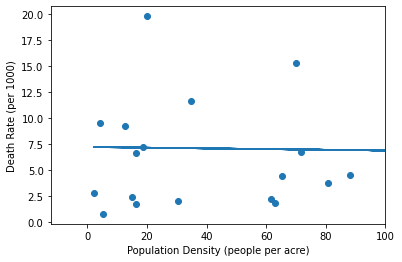

R-squared: 0.003


In [27]:
# Generating x and y variables for scatterplot: population density vs. mortality "

x = Outbreak['pop_density']
y = Outbreak['deaths_per_1000']

# Plot the data points
plt.scatter(x, y)

# Here we add a 'line of best fit' that helps us visualize potential correlation!
m, b = np.polyfit(x, y, 1)
# Put the line of best fit on the plot.
plt.plot(x, m*x + b)

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)

# Add labeling to the x and y axis, set the  limits of the axis
plt.xlabel('Population Density (people per acre)')
plt.ylabel('Death Rate (per 1000)')

plt.xlim(right = 100)

# Reveal the plot.
plt.show()

# Print the correlation coefficient value.
print(f"R-squared: {r_value**2:.3f}")

### Exercise -- go to the previous cells and explore a total of 4 independent variables. Record what you learn from each in the following table:
- note, you will need to edit the Markdown by double clicking in this cell!

| Explanatory Variable | Correlation (Pos., Neg. or None) |  R-squared value | Notes |
|---|---|---|---|
|Pop Density   | None  | 0.003  | No relationship  |
| House Value  | Negative |  0.129 | Weak negative relationship  |
| Number of Houses | Negative  | 0.017  | Weak negative relationship  |
| Elevation | Negative  | 0.233  | Weak negative relationship  |

<img src="https://github.com/uchicago-dsi/2023-data4all/blob/main/imgs/pencil.png?raw=true" alt="Drawing" align=left width=20px/> <font size=4>**Journal 3D:** Results of Exploration </font>

**Which independent variables are most related to cholera rates, and why?**
> Write your answer here!

<img src="https://github.com/uchicago-dsi/2023-data4all/blob/main/imgs/pencil.png?raw=true" alt="Drawing" align=left width=20px/> <font size=4>**Journal 3E:** Reflection </font>

At the end of each notebook in Data4All, we will take time to reflect on what we learned! You can write as much or as little as you like, but please answer the following three questions...

**What do you understand better after this notebook than before?**
> Write your answer here!

**Please fill out the Notebook survey here!**
> https://forms.gle/54KHEbPGsRxQU3Bh9

<br>

--------------------------------

<br>

<img src="https://github.com/uchicago-dsi/2023-data4all/blob/main/imgs/save-icon.jpeg?raw=true" alt="Drawing" align=left width=20px/> <font size="4">     **&ensp;&ensp;&ensp;Last step: save your work!** </font>